#Project Dissertation (CI7000_A_SPAN1_21)

## Implementaion of recommendation system for various datasets

* MovieLens-100K
---


*    Ladan Saeidi - K2145352


# Installing Required Libraries

In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633977 sha256=fa2dfeeed592c2d967bc624024fef6c2b6871e7a3954f9a297562b2cf221bc47
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


# Importing Required Libraries

In [ ]:
from surprise import SVD, KNNBasic, KNNBaseline, NMF, CoClustering, NormalPredictor, SlopeOne, KNNWithMeans, KNNWithZScore
from surprise import Dataset
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Importing Data

In [ ]:
# Load the movielens-100K dataset
data = Dataset.load_builtin('ml-100k')


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
df = pd.DataFrame(data.__dict__['raw_ratings'], columns=['user_id','item_id','rating','timestamp'])
df

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


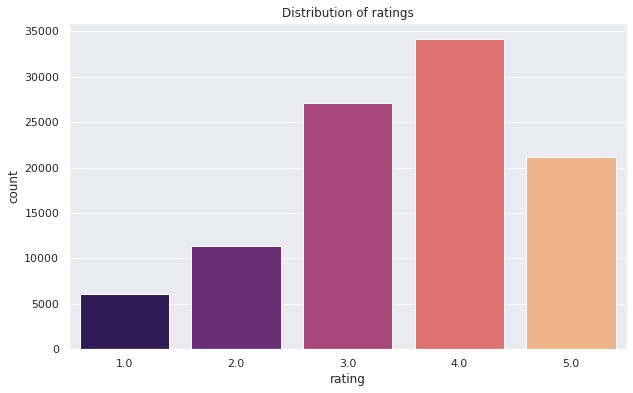

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
ax =sns.countplot(x='rating',data=df,palette="magma")
ax.set_title('Distribution of ratings');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    100000 non-null  object 
 1   item_id    100000 non-null  object 
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


In [ ]:
df['rating'].value_counts()

4.0    34174
3.0    27145
5.0    21201
2.0    11370
1.0     6110
Name: rating, dtype: int64

# Implementing Algorithms

## SVD

In [ ]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9374  0.9392  0.9281  0.9406  0.9315  0.9354  0.0048  
MAE (testset)     0.7391  0.7406  0.7350  0.7406  0.7326  0.7376  0.0032  
Fit time          4.92    4.91    4.92    5.00    4.93    4.94    0.03    
Test time         0.22    0.15    0.20    0.22    0.16    0.19    0.03    


{'test_rmse': array([0.93743176, 0.93919732, 0.92807355, 0.94055435, 0.93150565]),
 'test_mae': array([0.73912876, 0.74064109, 0.73501518, 0.74058411, 0.73257003]),
 'fit_time': (4.923129081726074,
  4.908226728439331,
  4.923451900482178,
  5.000539541244507,
  4.93039870262146),
 'test_time': (0.21788835525512695,
  0.15187454223632812,
  0.19990205764770508,
  0.22137975692749023,
  0.16366052627563477)}

In [ ]:
# We'll use the famous SVD algorithm.
algo = SVD(n_factors=30, n_epochs=50,biased=True, lr_all=0.005, reg_all=0.4, verbose=False)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE', 'MSE'], cv=5, verbose=True)

Evaluating RMSE, MAE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9534  0.9596  0.9480  0.9553  0.9579  0.9548  0.0040  
MAE (testset)     0.7635  0.7699  0.7601  0.7645  0.7644  0.7645  0.0032  
MSE (testset)     0.9089  0.9208  0.8987  0.9127  0.9176  0.9117  0.0077  
Fit time          5.95    6.01    5.98    6.00    5.98    5.98    0.02    
Test time         0.20    0.21    0.18    0.15    0.21    0.19    0.02    


{'test_rmse': array([0.9533596 , 0.95957176, 0.94800955, 0.95533152, 0.95790609]),
 'test_mae': array([0.76346283, 0.76994694, 0.76012967, 0.76453385, 0.76437112]),
 'test_mse': array([0.90889453, 0.92077796, 0.89872212, 0.91265832, 0.91758408]),
 'fit_time': (5.949008464813232,
  6.010250568389893,
  5.978941917419434,
  5.996131181716919,
  5.982287406921387),
 'test_time': (0.20386695861816406,
  0.2113027572631836,
  0.1803150177001953,
  0.15250658988952637,
  0.2112593650817871)}

## KNNBasic

In [ ]:
similarity_options = {
    'name': 'pearson',
    'user_based': 'False'
}

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = similarity_options)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0134  1.0100  1.0056  1.0210  1.0084  1.0117  0.0053  
MAE (testset)     0.8013  0.8025  0.7979  0.8117  0.8025  0.8032  0.0046  
Fit time          1.26    1.26    1.28    1.32    1.26    1.27    0.02    
Test time         3.40    3.46    3.39    3.40    3.44    3.42    0.03    


{'test_rmse': array([1.01337726, 1.01003386, 1.00556154, 1.02095171, 1.00839754]),
 'test_mae': array([0.80128587, 0.80250222, 0.79785024, 0.81168409, 0.80254749]),
 'fit_time': (1.2554638385772705,
  1.260929822921753,
  1.2761456966400146,
  1.3175365924835205,
  1.2596607208251953),
 'test_time': (3.4026124477386475,
  3.455160617828369,
  3.3870177268981934,
  3.398206949234009,
  3.4407176971435547)}

In [ ]:
similarity_options1 = {
    'name': 'pearson',
    'user_based': 'True'
}

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = similarity_options1)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0051  1.0126  1.0130  1.0069  1.0166  1.0108  0.0042  
MAE (testset)     0.7968  0.8065  0.8036  0.7997  0.8074  0.8028  0.0040  
Fit time          1.37    1.25    1.25    1.26    1.25    1.28    0.05    
Test time         3.34    3.42    3.41    3.34    3.39    3.38    0.03    


{'test_rmse': array([1.00512699, 1.01255505, 1.01296626, 1.0069141 , 1.01658939]),
 'test_mae': array([0.79683515, 0.80651911, 0.8036428 , 0.79971817, 0.80741716]),
 'fit_time': (1.366994857788086,
  1.2472665309906006,
  1.2533299922943115,
  1.2570877075195312,
  1.2527639865875244),
 'test_time': (3.3447651863098145,
  3.419318675994873,
  3.4133942127227783,
  3.340479850769043,
  3.3938753604888916)}

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = {'name': 'msd','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9751  0.9749  0.9772  0.9773  0.9877  0.9784  0.0048  
MAE (testset)     0.7699  0.7680  0.7714  0.7717  0.7804  0.7723  0.0043  
Fit time          0.37    0.57    0.50    0.40    0.39    0.45    0.08    
Test time         3.67    3.56    3.43    3.46    3.39    3.50    0.10    


{'test_rmse': array([0.97507697, 0.97491758, 0.97719476, 0.97727719, 0.98773122]),
 'test_mae': array([0.76991825, 0.76797921, 0.77142315, 0.77170667, 0.78038266]),
 'fit_time': (0.3688387870788574,
  0.573190450668335,
  0.5032546520233154,
  0.3954310417175293,
  0.3901376724243164),
 'test_time': (3.6659529209136963,
  3.5576953887939453,
  3.4318361282348633,
  3.4580161571502686,
  3.3885347843170166)}

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = {'name': 'msd','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9844  0.9839  0.9766  0.9769  0.9726  0.9789  0.0046  
MAE (testset)     0.7749  0.7787  0.7716  0.7711  0.7708  0.7734  0.0030  
Fit time          0.36    0.39    0.40    0.41    0.39    0.39    0.02    
Test time         3.43    3.33    3.41    3.42    3.37    3.39    0.04    


{'test_rmse': array([0.98443439, 0.98393195, 0.97660212, 0.97686486, 0.97263293]),
 'test_mae': array([0.7749488 , 0.77871541, 0.77159853, 0.7710676 , 0.77079869]),
 'fit_time': (0.3579823970794678,
  0.38539743423461914,
  0.40159106254577637,
  0.40894317626953125,
  0.3949422836303711),
 'test_time': (3.430312395095825,
  3.3274378776550293,
  3.4085028171539307,
  3.4187729358673096,
  3.37119197845459)}

## NMF

In [ ]:
# We'll use the famous NMF algorithm.
algo = NMF()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9617  0.9598  0.9677  0.9739  0.9565  0.9639  0.0062  
MAE (testset)     0.7550  0.7574  0.7610  0.7658  0.7500  0.7578  0.0054  
Fit time          5.33    5.30    5.44    5.60    6.65    5.66    0.51    
Test time         0.19    0.18    0.19    0.12    0.19    0.17    0.03    


{'test_rmse': array([0.96167006, 0.95975102, 0.96772784, 0.97386597, 0.95654809]),
 'test_mae': array([0.75502962, 0.75740034, 0.76096243, 0.7658251 , 0.74997   ]),
 'fit_time': (5.329355478286743,
  5.297111749649048,
  5.435777187347412,
  5.602637052536011,
  6.653698921203613),
 'test_time': (0.18619751930236816,
  0.18471026420593262,
  0.18560338020324707,
  0.12054109573364258,
  0.18530654907226562)}

## KNNBaseline

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9200  0.9346  0.9291  0.9315  0.9355  0.9301  0.0056  
MAE (testset)     0.7252  0.7348  0.7326  0.7328  0.7387  0.7328  0.0044  
Fit time          0.81    0.79    0.82    0.80    0.83    0.81    0.02    
Test time         3.95    3.82    4.12    4.06    3.93    3.98    0.10    


{'test_rmse': array([0.9199619 , 0.93464816, 0.92911332, 0.93148264, 0.93548776]),
 'test_mae': array([0.72518502, 0.73477166, 0.73260571, 0.73276025, 0.73868031]),
 'fit_time': (0.8093254566192627,
  0.7863626480102539,
  0.8212800025939941,
  0.8037295341491699,
  0.8308670520782471),
 'test_time': (3.9520862102508545,
  3.8212287425994873,
  4.124006748199463,
  4.056188106536865,
  3.932356357574463)}

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9346  0.9254  0.9331  0.9324  0.9305  0.9312  0.0032  
MAE (testset)     0.7355  0.7273  0.7346  0.7329  0.7289  0.7318  0.0032  
Fit time          1.83    1.65    1.68    1.63    1.65    1.69    0.07    
Test time         3.88    4.09    3.90    3.87    3.82    3.91    0.09    


{'test_rmse': array([0.93461481, 0.92539306, 0.93310048, 0.9324247 , 0.93048686]),
 'test_mae': array([0.73550226, 0.72731546, 0.73461717, 0.73289352, 0.72887867]),
 'fit_time': (1.831139326095581,
  1.6549675464630127,
  1.675015926361084,
  1.625018835067749,
  1.6456594467163086),
 'test_time': (3.875164747238159,
  4.088971138000488,
  3.902280569076538,
  3.8657617568969727,
  3.8248043060302734)}

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'pearson','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9253  0.9272  0.9421  0.9324  0.9325  0.9319  0.0058  
MAE (testset)     0.7269  0.7279  0.7407  0.7345  0.7336  0.7327  0.0050  
Fit time          1.74    1.63    1.69    1.65    1.65    1.67    0.04    
Test time         3.77    3.89    3.86    3.88    3.81    3.84    0.04    


{'test_rmse': array([0.92531531, 0.92715912, 0.94207265, 0.93240873, 0.93247258]),
 'test_mae': array([0.72688546, 0.72794765, 0.74066518, 0.73452295, 0.73358132]),
 'fit_time': (1.7445318698883057,
  1.632063388824463,
  1.6893460750579834,
  1.649571418762207,
  1.6469073295593262),
 'test_time': (3.770503044128418,
  3.885465145111084,
  3.8566479682922363,
  3.8780078887939453,
  3.8128743171691895)}

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'msd','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9311  0.9290  0.9352  0.9239  0.9297  0.9298  0.0036  
MAE (testset)     0.7355  0.7307  0.7378  0.7289  0.7311  0.7328  0.0033  
Fit time          0.82    0.83    0.80    0.80    0.80    0.81    0.01    
Test time         3.97    3.93    3.83    3.83    3.89    3.89    0.05    


{'test_rmse': array([0.93110477, 0.92896436, 0.93517655, 0.9239491 , 0.92973698]),
 'test_mae': array([0.73551265, 0.73070408, 0.73782582, 0.72887886, 0.73109004]),
 'fit_time': (0.8209593296051025,
  0.8324337005615234,
  0.79852294921875,
  0.8000857830047607,
  0.802788496017456),
 'test_time': (3.969271421432495,
  3.9279956817626953,
  3.829279661178589,
  3.8300230503082275,
  3.889061450958252)}

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'msd','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9254  0.9267  0.9261  0.9379  0.9339  0.9300  0.0050  
MAE (testset)     0.7283  0.7304  0.7304  0.7368  0.7349  0.7322  0.0032  
Fit time          0.83    0.78    0.79    0.82    0.79    0.80    0.02    
Test time         6.06    3.86    3.85    3.90    3.89    4.31    0.87    


{'test_rmse': array([0.92535448, 0.92665153, 0.92614459, 0.93792306, 0.93386578]),
 'test_mae': array([0.72834102, 0.73038822, 0.73039349, 0.73675696, 0.73493867]),
 'fit_time': (0.8290209770202637,
  0.780012845993042,
  0.7894220352172852,
  0.8188447952270508,
  0.7947664260864258),
 'test_time': (6.057010889053345,
  3.861855983734131,
  3.849891185760498,
  3.9024617671966553,
  3.8868274688720703)}

## CoClustering

In [ ]:
# We'll use the famous CoClustering algorithm.
algo = CoClustering()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9593  0.9601  0.9630  0.9575  0.9718  0.9623  0.0051  
MAE (testset)     0.7514  0.7504  0.7524  0.7471  0.7634  0.7529  0.0055  
Fit time          2.32    2.33    2.22    2.23    2.20    2.26    0.05    
Test time         0.16    0.17    0.10    0.10    0.16    0.14    0.03    


{'test_rmse': array([0.9592881 , 0.9600614 , 0.96301672, 0.95752607, 0.97181837]),
 'test_mae': array([0.75135721, 0.75039926, 0.75236742, 0.74707921, 0.7633562 ]),
 'fit_time': (2.3174211978912354,
  2.3250632286071777,
  2.2176873683929443,
  2.228518009185791,
  2.2033627033233643),
 'test_time': (0.16324687004089355,
  0.16592907905578613,
  0.0985262393951416,
  0.10260343551635742,
  0.16037464141845703)}

## NormalPredictor

In [ ]:
# We'll use the famous NormalPredictor algorithm.
algo = NormalPredictor()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5186  1.5138  1.5140  1.5135  1.5208  1.5161  0.0030  
MAE (testset)     1.2201  1.2190  1.2162  1.2149  1.2211  1.2183  0.0023  
Fit time          0.13    0.17    0.18    0.17    0.17    0.16    0.02    
Test time         0.22    0.20    0.14    0.20    0.20    0.19    0.03    


{'test_rmse': array([1.51856937, 1.51382234, 1.5139512 , 1.51352266, 1.52076266]),
 'test_mae': array([1.22009132, 1.2190012 , 1.21621465, 1.21488402, 1.2211017 ]),
 'fit_time': (0.12990856170654297,
  0.16918301582336426,
  0.17638826370239258,
  0.16619038581848145,
  0.1721494197845459),
 'test_time': (0.2217545509338379,
  0.20306992530822754,
  0.13816070556640625,
  0.20160269737243652,
  0.2001171112060547)}

## SlopeOne

In [ ]:
# We'll use the famous SlopeOne algorithm.
algo = SlopeOne()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9486  0.9464  0.9382  0.9514  0.9393  0.9448  0.0052  
MAE (testset)     0.7485  0.7447  0.7396  0.7460  0.7346  0.7427  0.0050  
Fit time          0.88    0.86    0.85    0.87    0.87    0.87    0.01    
Test time         2.82    2.78    2.86    2.89    2.82    2.83    0.04    


{'test_rmse': array([0.94862332, 0.94641531, 0.93819254, 0.95139245, 0.93931756]),
 'test_mae': array([0.74848364, 0.74469892, 0.73963559, 0.74600636, 0.73458106]),
 'fit_time': (0.8798437118530273,
  0.8647143840789795,
  0.8503596782684326,
  0.8651034832000732,
  0.8673183917999268),
 'test_time': (2.8226945400238037,
  2.7795333862304688,
  2.8634681701660156,
  2.8871748447418213,
  2.820704698562622)}

## KNNWithMeans

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'pearson','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9484  0.9448  0.9515  0.9549  0.9439  0.9487  0.0041  
MAE (testset)     0.7412  0.7408  0.7435  0.7466  0.7406  0.7426  0.0023  
Fit time          1.28    1.48    1.33    1.28    1.33    1.34    0.07    
Test time         3.49    3.57    3.53    3.45    3.63    3.54    0.06    


{'test_rmse': array([0.9483769 , 0.9448    , 0.95145714, 0.95491836, 0.94388327]),
 'test_mae': array([0.74118596, 0.74082107, 0.74353279, 0.7466383 , 0.74058956]),
 'fit_time': (1.27828049659729,
  1.4792511463165283,
  1.3346164226531982,
  1.2835514545440674,
  1.3305578231811523),
 'test_time': (3.4860646724700928,
  3.5725321769714355,
  3.5333027839660645,
  3.452704429626465,
  3.6332757472991943)}

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9545  0.9494  0.9446  0.9501  0.9549  0.9507  0.0038  
MAE (testset)     0.7473  0.7444  0.7406  0.7427  0.7467  0.7443  0.0025  
Fit time          1.33    1.34    1.32    1.34    1.32    1.33    0.01    
Test time         3.52    3.57    3.47    3.61    3.58    3.55    0.05    


{'test_rmse': array([0.95454265, 0.94937585, 0.94464369, 0.9500736 , 0.95486046]),
 'test_mae': array([0.74728894, 0.74439068, 0.74064982, 0.74268271, 0.7467181 ]),
 'fit_time': (1.3343162536621094,
  1.33827805519104,
  1.32132887840271,
  1.342736005783081,
  1.3202064037322998),
 'test_time': (3.5230000019073486,
  3.5748043060302734,
  3.4717471599578857,
  3.6055309772491455,
  3.581989288330078)}

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'msd','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9458  0.9521  0.9420  0.9500  0.9607  0.9501  0.0063  
MAE (testset)     0.7479  0.7469  0.7420  0.7488  0.7590  0.7489  0.0056  
Fit time          0.46    0.47    0.47    0.46    0.47    0.47    0.00    
Test time         3.61    3.50    3.51    3.60    3.46    3.54    0.06    


{'test_rmse': array([0.94582351, 0.95206501, 0.94195228, 0.94999628, 0.96067254]),
 'test_mae': array([0.74785605, 0.74690844, 0.74200329, 0.7488102 , 0.75898596]),
 'fit_time': (0.46336984634399414,
  0.4660654067993164,
  0.46971940994262695,
  0.45684051513671875,
  0.4692049026489258),
 'test_time': (3.6132376194000244,
  3.5031771659851074,
  3.5061962604522705,
  3.597656011581421,
  3.457763671875)}

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'msd','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9474  0.9485  0.9468  0.9535  0.9516  0.9496  0.0026  
MAE (testset)     0.7478  0.7464  0.7461  0.7496  0.7510  0.7482  0.0019  
Fit time          0.44    0.47    0.46    0.43    0.47    0.45    0.02    
Test time         3.54    3.56    3.51    3.47    3.53    3.52    0.03    


{'test_rmse': array([0.94739963, 0.94849891, 0.94683201, 0.9534501 , 0.95164108]),
 'test_mae': array([0.7477791 , 0.74642216, 0.74607063, 0.74961685, 0.75096895]),
 'fit_time': (0.43663907051086426,
  0.46813297271728516,
  0.4586210250854492,
  0.43199658393859863,
  0.47101259231567383),
 'test_time': (3.5370657444000244,
  3.557551622390747,
  3.514892339706421,
  3.472161054611206,
  3.529202461242676)}

## KNNWithZScore

In [ ]:
# We'll use the famous KNNWithZScore algorithm.
algo = KNNWithZScore(sim_options={'name': 'pearson','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9464  0.9474  0.9500  0.9483  0.9420  0.9468  0.0027  
MAE (testset)     0.7380  0.7400  0.7412  0.7415  0.7349  0.7391  0.0025  
Fit time          1.39    1.37    1.42    1.36    1.43    1.40    0.03    
Test time         3.65    3.66    3.66    3.61    3.69    3.65    0.03    


{'test_rmse': array([0.94636931, 0.94736451, 0.9500204 , 0.94825501, 0.94195508]),
 'test_mae': array([0.73801171, 0.73998578, 0.741217  , 0.74153358, 0.73486212]),
 'fit_time': (1.3939077854156494,
  1.3694062232971191,
  1.4220852851867676,
  1.3621821403503418,
  1.4305036067962646),
 'test_time': (3.645301580429077,
  3.6582202911376953,
  3.657773733139038,
  3.6124775409698486,
  3.6923017501831055)}

In [ ]:
# We'll use the famous KNNWithZScore algorithm.
algo = KNNWithZScore(sim_options={'name': 'pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9449  0.9461  0.9501  0.9498  0.9517  0.9485  0.0026  
MAE (testset)     0.7398  0.7391  0.7420  0.7388  0.7421  0.7404  0.0014  
Fit time          1.49    1.43    1.41    1.42    1.43    1.43    0.03    
Test time         3.74    3.73    3.71    3.66    3.75    3.72    0.03    


{'test_rmse': array([0.94494535, 0.9460629 , 0.95010972, 0.9498414 , 0.95167763]),
 'test_mae': array([0.73982317, 0.73913272, 0.74200666, 0.73877436, 0.74213014]),
 'fit_time': (1.4885551929473877,
  1.4272751808166504,
  1.4056992530822754,
  1.4172468185424805,
  1.4328892230987549),
 'test_time': (3.739347219467163,
  3.728266954421997,
  3.7055108547210693,
  3.663978338241577,
  3.7496142387390137)}

In [ ]:
# We'll use the famous KNNWithZScore algorithm.
algo = KNNWithZScore(sim_options={'name': 'msd','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9556  0.9445  0.9458  0.9571  0.9447  0.9495  0.0056  
MAE (testset)     0.7509  0.7413  0.7407  0.7509  0.7412  0.7450  0.0048  
Fit time          0.65    0.52    0.52    0.54    0.53    0.55    0.05    
Test time         3.74    3.64    3.62    3.68    3.68    3.67    0.04    


{'test_rmse': array([0.95561568, 0.94447236, 0.94584535, 0.95706916, 0.94469899]),
 'test_mae': array([0.7509336 , 0.74127362, 0.74072631, 0.75089327, 0.74122779]),
 'fit_time': (0.6482651233673096,
  0.5223643779754639,
  0.5211470127105713,
  0.5386929512023926,
  0.5349409580230713),
 'test_time': (3.7377240657806396,
  3.644287586212158,
  3.6245594024658203,
  3.6757922172546387,
  3.6766629219055176)}

# Plotting RMSE

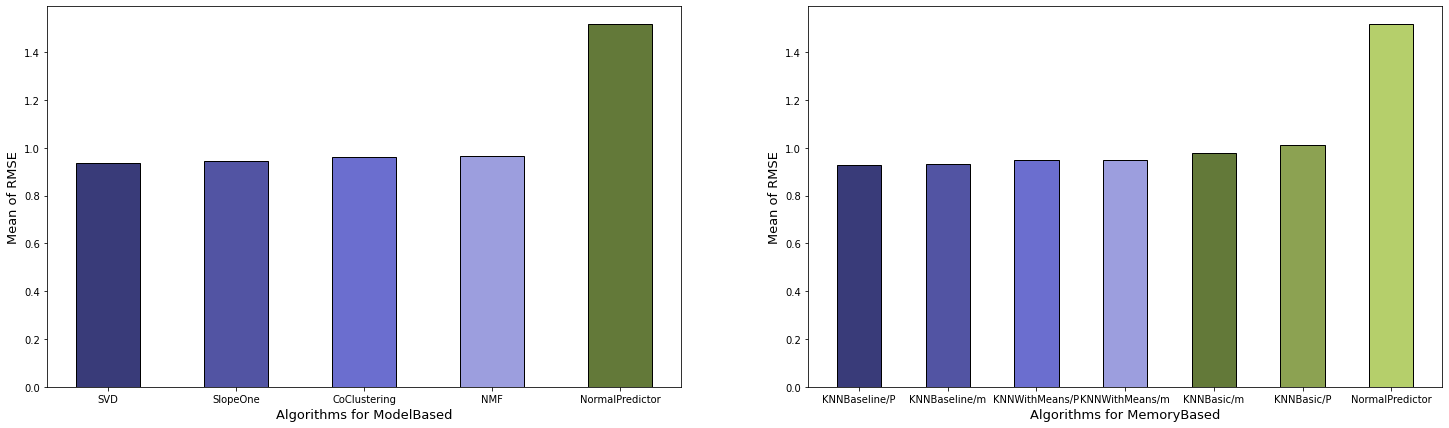

In [ ]:
algs1 = ['SVD', 'CoClustering', 'SlopeOne', 'NMF', 'NormalPredictor']
meanOfrmse1 = [0.9354,0.9623,0.9448,0.9639,1.5161 ]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "RMSE":meanOfrmse1})


algs2 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
meanOfrmse2 = [1.0108,0.9784 , 0.9298, 0.9300, 0.9487  , 0.9496, 1.5161]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "RMSE":meanOfrmse2})

	
df1_sorted= df1.sort_values('RMSE')
df2_sorted= df2.sort_values('RMSE')


plt.figure(figsize=(25,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'RMSE', data=df1_sorted,  width=0.5,color=col_map.colors, edgecolor='k')  
# df1_sorted['RMSE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for ModelBased', fontsize=13)
plt.ylabel('Mean of RMSE', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'RMSE',  data=df2_sorted ,color=col_map.colors, edgecolor='k', width=0.5)
# df2_sorted['RMSE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for MemoryBased', fontsize=13)
plt.ylabel('Mean of RMSE', fontsize=13)
plt.show()


# Plotting MAE

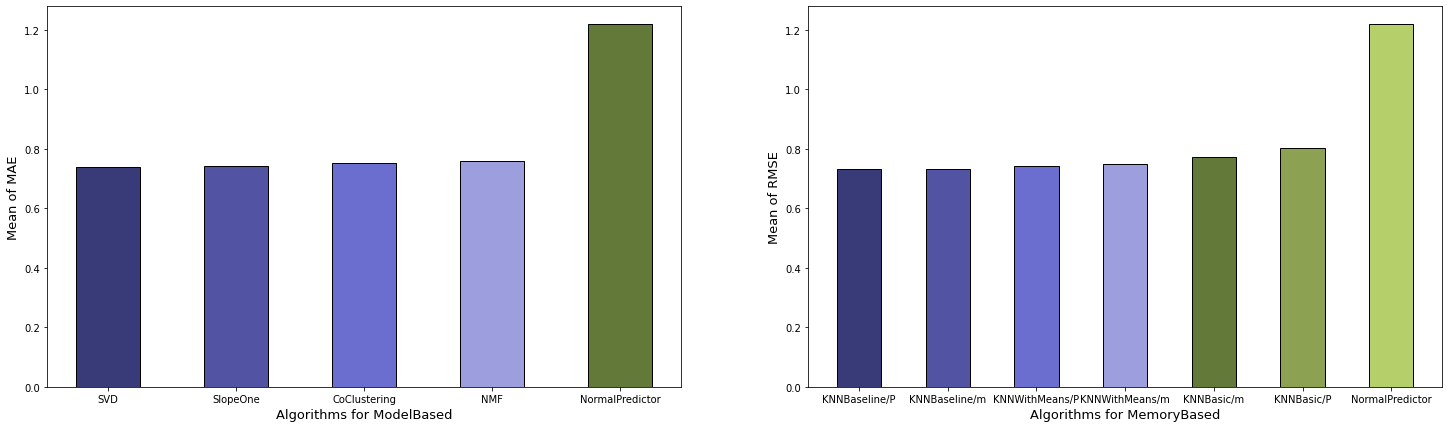

In [ ]:
algs1 = ['SVD', 'CoClustering', 'SlopeOne', 'NMF', 'NormalPredictor']
meanOfmae1 = [0.7376,0.7529,0.7427,0.7578,1.2183]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "MAE":meanOfmae1})


algs2 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
meanOfmae2 = [0.8028,0.7723, 0.7318, 0.7328, 0.7426, 0.7482, 1.2183]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "MAE":meanOfmae2})

	
df1_sorted= df1.sort_values('MAE')
df2_sorted= df2.sort_values('MAE')


plt.figure(figsize=(25,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'MAE', data=df1_sorted,  width=0.5,color=col_map.colors, edgecolor='k')  
# df1_sorted['MAE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for ModelBased', fontsize=13)
plt.ylabel('Mean of MAE', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'MAE',  data=df2_sorted ,color=col_map.colors, edgecolor='k', width=0.5)
# df2_sorted['MAE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for MemoryBased', fontsize=13)
plt.ylabel('Mean of RMSE', fontsize=13)
plt.show()


# Plotting RMSE and MAE on Multiple Bar Chart

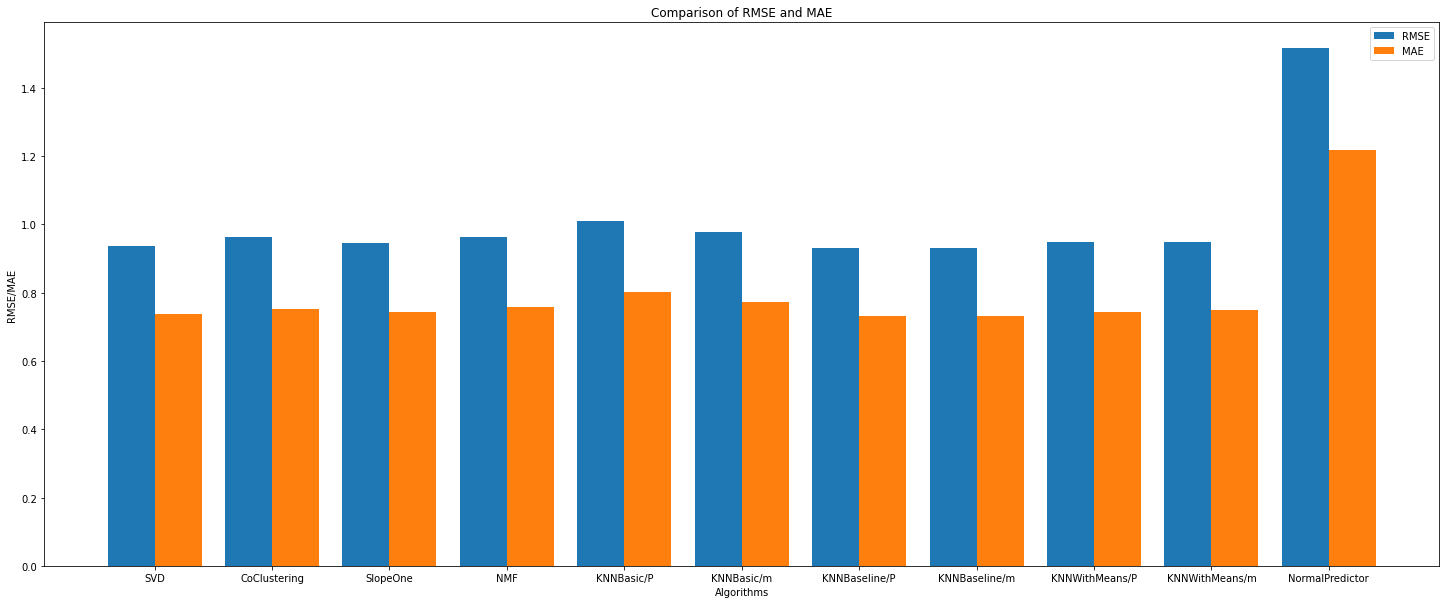

In [ ]:
X = ['SVD', 'CoClustering', 'SlopeOne', 'NMF','KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
rmse = [0.9354,0.9623,0.9448,0.9639, 1.0108,0.9784 , 0.9298, 0.9300, 0.9487  , 0.9496,1.5161]
mae = [0.7376,0.7529,0.7427,0.7578, 0.8028,0.7723, 0.7318, 0.7328, 0.7426, 0.7482 ,1.2183]
plt.figure(figsize=[25, 10])
X_axis = np.arange(len(X))

# df1 = pd.DataFrame({"Algorithms":X,
#                   "RMSE":rmse})
# df2 = pd.DataFrame({"Algorithms":X,
#                   "MAE":mae})

# df1_sorted= df1.sort_values('RMSE')
# df2_sorted= df2.sort_values('MAE')

plt.bar(X_axis - 0.2, rmse, 0.4, label = 'RMSE')
plt.bar(X_axis + 0.2, mae, 0.4, label = 'MAE')

# plt.bar(np.arange(len(rmse)), rmse, width=0.4, data=df1_sorted)
# plt.bar(np.arange(len(mae))+ 0.4, mae, width=0.4, data=df2_sorted)


plt.xticks(X_axis, X)
plt.xlabel("Algorithms",fontsize=10)
plt.ylabel("RMSE/MAE",fontsize=10)
plt.title("Comparison of RMSE and MAE")
plt.legend()
plt.show()

# Plotting Fit_time VS Test_Time

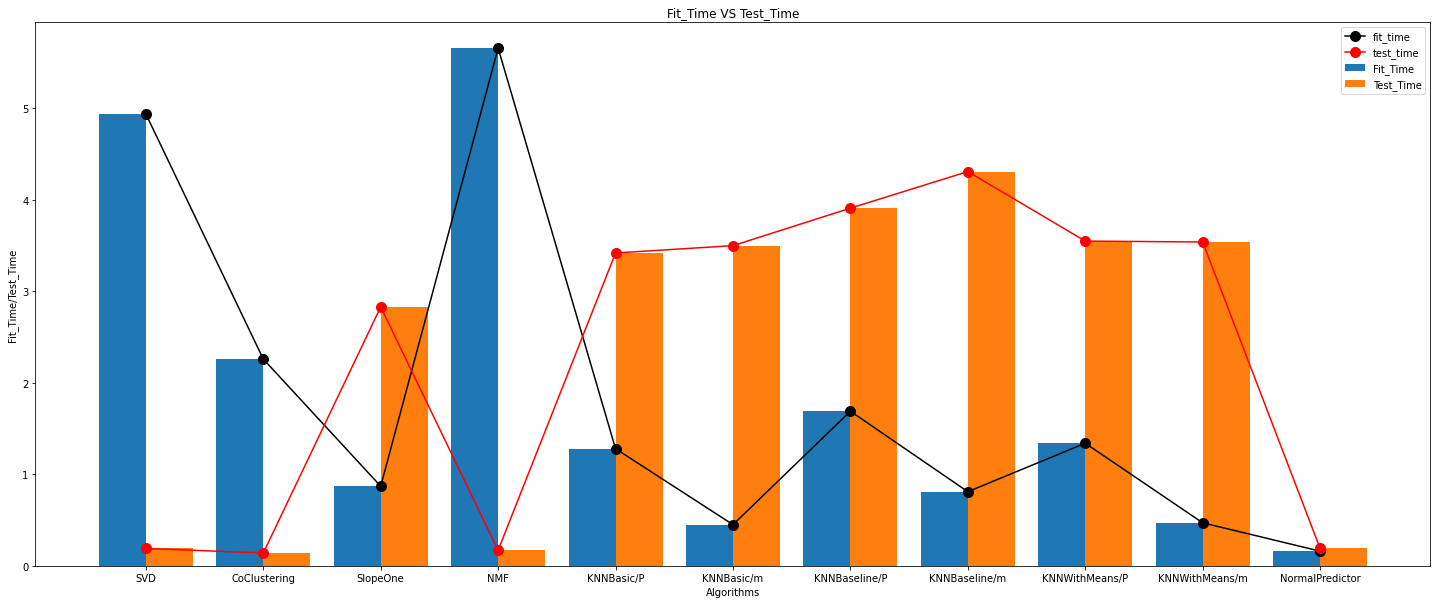

In [ ]:
X = ['SVD', 'CoClustering', 'SlopeOne', 'NMF','KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
fit_time = [ 4.94,2.26,0.87,5.66,1.28,0.45,1.69,0.81,1.34,0.47, 0.16	]
test_time = [0.19,0.14,2.83,0.17,3.42,3.50,3.91,4.31,3.55,3.54,0.19]
plt.figure(figsize=[25, 10])
X_axis = np.arange(len(X))

df1 = pd.DataFrame({"Algorithms":X,
                  "fit_time":fit_time})
df2 = pd.DataFrame({"Algorithms":X,
                  "test_time":test_time})

# df1_sorted= df1.sort_values('RMSE')
# df2_sorted= df2.sort_values('MAE')

plt.bar(X_axis - 0.2, fit_time, 0.4, label = 'Fit_Time')
plt.bar(X_axis + 0.2, test_time, 0.4, label = 'Test_Time')
df1['fit_time'].plot(kind='line', marker='o', color='black', ms=10)
df2['test_time'].plot(kind='line', marker='o', color='red', ms=10)
# plt.bar(np.arange(len(rmse)), rmse, width=0.4, data=df1_sorted)
# plt.bar(np.arange(len(mae))+ 0.4, mae, width=0.4, data=df2_sorted)


plt.xticks(X_axis, X)
plt.xlabel("Algorithms",fontsize=10)
plt.ylabel("Fit_Time/Test_Time",fontsize=10)
plt.title("Fit_Time VS Test_Time")
plt.legend()
plt.show()

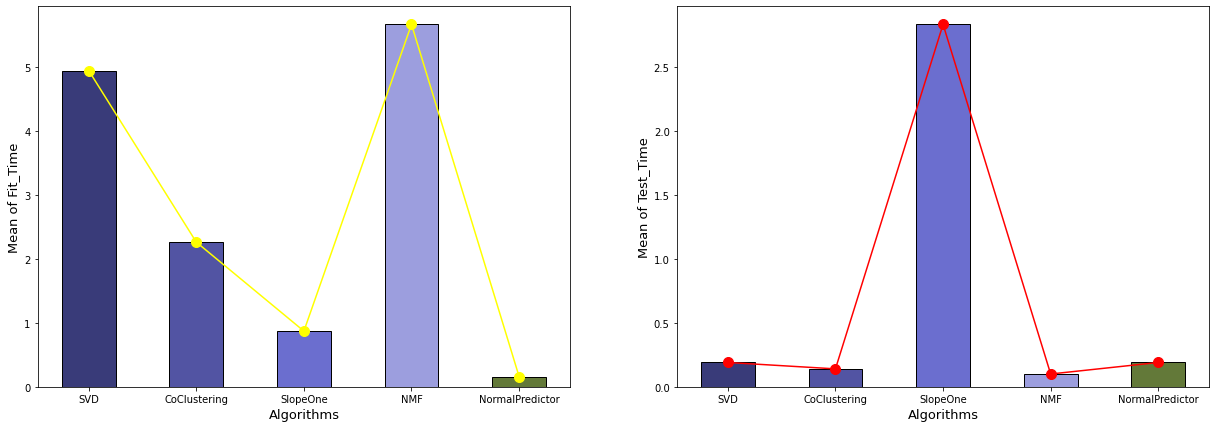

In [ ]:
algs1 = ['SVD', 'CoClustering', 'SlopeOne', 'NMF', 'NormalPredictor']
fit_time = [4.94,2.26,0.87,5.66, 0.16]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "fit_time":fit_time})


algs2 = ['SVD', 'CoClustering', 'SlopeOne', 'NMF', 'NormalPredictor']
test_time = [0.19,0.14,2.83,0.1, 0.19]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "test_time":test_time})

	
# df1_sorted= df1.sort_values('MAE')
# df2_sorted= df2.sort_values('MAE')


plt.figure(figsize=(21,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'fit_time', data=df1,  width=0.5,color=col_map.colors, edgecolor='k')  
df1['fit_time'].plot(kind='line', marker='o', color='yellow', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Fit_Time', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'test_time',  data=df2 ,color=col_map.colors, edgecolor='k', width=0.5)
df2['test_time'].plot(kind='line', marker='o', color='red', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Test_Time', fontsize=13)
plt.show()


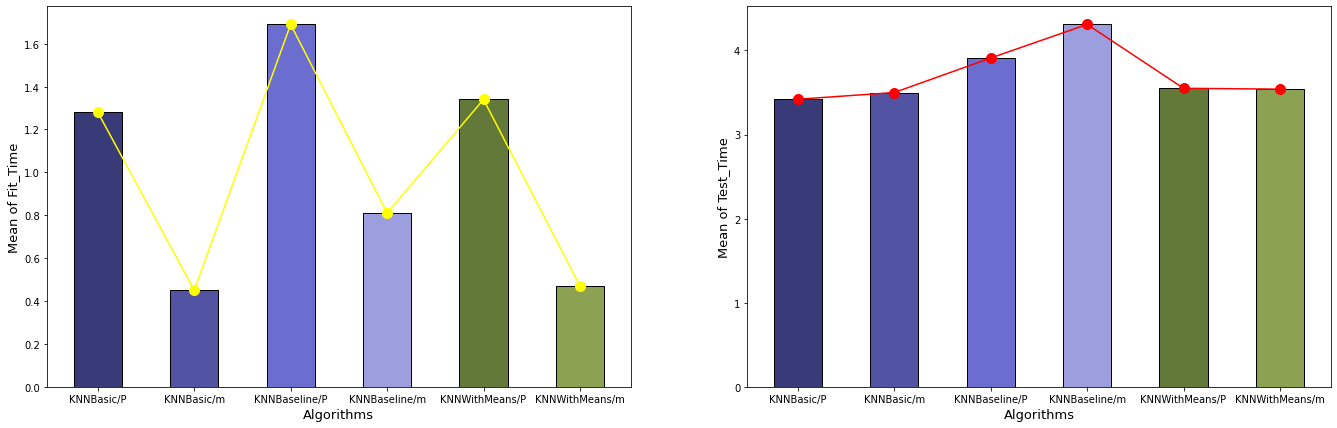

In [ ]:
algs1 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m']
fit_time = [1.28,0.45,1.69,0.81,1.34,0.47]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "fit_time":fit_time})


algs2 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m']
test_time = [3.42,3.50,3.91,4.31,3.55,3.54]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "test_time":test_time})

	
# df1_sorted= df1.sort_values('MAE')
# df2_sorted= df2.sort_values('MAE')


plt.figure(figsize=(23,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'fit_time', data=df1,  width=0.5,color=col_map.colors, edgecolor='k')  
df1['fit_time'].plot(kind='line', marker='o', color='yellow', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Fit_Time', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'test_time',  data=df2 ,color=col_map.colors, edgecolor='k', width=0.5)
df2['test_time'].plot(kind='line', marker='o', color='red', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Test_Time', fontsize=13)
plt.show()


# References
* The above code adopted from this link, and used in this implementation by making some changes. All figures' codes and results are written from scratch.

http://surpriselib.com/

https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b